### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [357]:
df = pd.read_csv('/content/sample_data/online_retail_II.csv')
df.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
162174,504882,21500,PINK SPOTS WRAP,25,2010-04-18 13:12:00,0.42,14395.0,United Kingdom
17058,490745,22120,WELCOME WOODEN BLOCK LETTERS,1,2009-12-07 18:02:00,20.83,NaN,United Kingdom
729386,554598,23302,KNEELING MAT HOUSEWORK DESIGN,3,2011-05-25 11:12:00,1.65,13263.0,United Kingdom
555107,538811,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,2010-12-14 12:22:00,1.95,13178.0,United Kingdom
507862,536821,21240,BLUE POLKADOT CUP,8,2010-12-02 17:17:00,0.85,17757.0,United Kingdom


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [359]:
rows, columns = df.shape
print(f"total rows: {rows}, total columns: {columns}")

total rows: 1067371, total columns: 8


In [360]:
for column_item in df.columns.values:
  print(f"total unique of {column_item}: {len(df[column_item].unique())}")

total unique of Invoice: 53628
total unique of StockCode: 5305
total unique of Description: 5699
total unique of Quantity: 1057
total unique of InvoiceDate: 47635
total unique of Price: 2807
total unique of Customer ID: 5943
total unique of Country: 43


In [361]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [362]:
missing_value = df.isna().sum()
print(missing_value)

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


## Section 1

### 1.1 Create New Feature: Year

In [363]:
# check InvoiceDate column
df['InvoiceDate'].head()

0    2009-12-01 07:45:00
1    2009-12-01 07:45:00
2    2009-12-01 07:45:00
3    2009-12-01 07:45:00
4    2009-12-01 07:45:00
Name: InvoiceDate, dtype: object

In [364]:
# check missing value in InvoiceDate column 
missing_value_in_InvoiceDate = df.loc[df['InvoiceDate'].isna()]
missing_value_in_InvoiceDate

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [365]:
# drop missing value based on NULL record index in InvoiceDate column
# then save into df_clean variable
df_clean = df.drop(missing_value_in_InvoiceDate.index)
print(df_clean.shape)

(1067371, 8)


In [366]:
# fill InvoiceDate value into Year column
df_clean['Year'] = df_clean['InvoiceDate']
df_clean['Year'].head()

0    2009-12-01 07:45:00
1    2009-12-01 07:45:00
2    2009-12-01 07:45:00
3    2009-12-01 07:45:00
4    2009-12-01 07:45:00
Name: Year, dtype: object

In [367]:
# check datatype from InvoiceDate Column
df_clean['InvoiceDate'].dtype

dtype('O')

In [368]:
# convert object dtype into datetime dtype in InvoiceDate column
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')
df_clean['InvoiceDate'].head()

0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
Name: InvoiceDate, dtype: datetime64[ns]

In [369]:
# only capture year value for InvoiceDate column
df_clean['InvoiceDate'] = df_clean['InvoiceDate'].dt.year
df_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009,6.95,13085.0,United Kingdom,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009,2.10,13085.0,United Kingdom,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009,1.25,13085.0,United Kingdom,2009-12-01 07:45:00


### 1.2 Filtering Data


Minimum quantity 1 (cannot be 0 and minus)

In [370]:
# summarize values of Quantity column that equal and less than 0
sum(df_clean['Quantity'] <= 0)

22950

In [371]:
# store values above zero in sales variable
# filtering result must be a dataframe
sales = pd.DataFrame(df_clean.loc[df_clean['Quantity'].values > 0])
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009,6.95,13085.0,United Kingdom,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009,2.10,13085.0,United Kingdom,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009,1.25,13085.0,United Kingdom,2009-12-01 07:45:00


In [372]:
# Check sales dimension
sales.shape

(1044421, 9)

Drop row contain 'C'

In [373]:
# only get record without 'C'
sales = sales.loc[sales['Invoice'].str.contains('C') == False]
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009,6.95,13085.0,United Kingdom,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009,2.10,13085.0,United Kingdom,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009,1.25,13085.0,United Kingdom,2009-12-01 07:45:00


### 1.3 Create New Feature: Revenue

In [374]:
#  store quntity time row result into Revenue Column
df_clean['Revenue'] = df_clean.apply(lambda row: row['Quantity'] * row['Price'], axis = 1)
df_clean['Revenue']

0           83.40
1           81.00
2           81.00
3          100.80
4           30.00
            ...  
1067366     12.60
1067367     16.60
1067368     16.60
1067369     14.85
1067370     18.00
Name: Revenue, Length: 1067371, dtype: float64

### 1.4 Average of Revenue per Year

In [375]:
# check year list inside InvoiceDate column
df_clean['InvoiceDate'].unique()

array([2009, 2010, 2011])

In [376]:
# find mean for serveral years
avarage_revenue = df_clean.groupby('InvoiceDate')['Revenue'].mean()
print(avarage_revenue)

InvoiceDate
2009    17.684777
2010    18.152555
2011    18.018195
Name: Revenue, dtype: float64


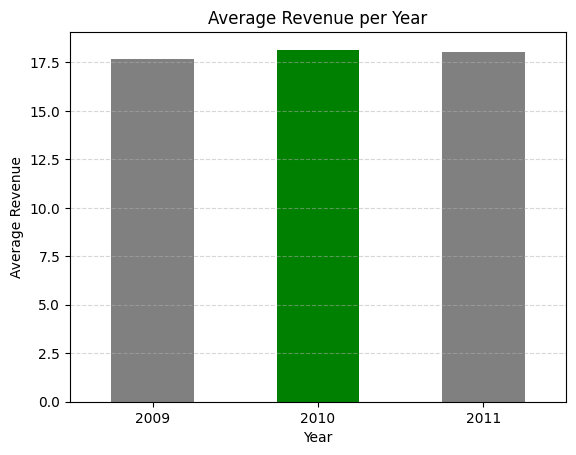

In [377]:
# visualize avarage revenue per Year
max_revenue = avarage_revenue.max()
color_condition = ['gray' if value != max_revenue else 'green' for value in avarage_revenue]
avarage_revenue.plot(kind = 'bar', color = color_condition)
plt.title('Average Revenue per Year')
plt.xlabel('Year')
plt.xticks(rotation = 0)
plt.ylabel('Average Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### 2.5 Interpretation

From the visualization above, **we can intreprate the highest average vanue is found in 2010 that reached 18.152555**. It followed by 2011 with 18.018195 average vanue and 2009 with 17.684777 average vanue.

## Section 2

### Filtering Data 

#### 2.1 Customers who finished their purchases

In [378]:
sales.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Year'],
      dtype='object')

In [379]:
len(sales['Customer ID'].isna())
sales.loc[sales['Customer ID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009,0.55,NaN,United Kingdom,2009-12-01 11:49:00
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009,0.85,NaN,United Kingdom,2009-12-01 11:49:00
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009,2.95,NaN,United Kingdom,2009-12-01 12:32:00
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009,1.25,NaN,United Kingdom,2009-12-01 12:32:00
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009,2.95,NaN,United Kingdom,2009-12-01 12:32:00
...,...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011,4.13,NaN,United Kingdom,2011-12-09 10:26:00
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011,4.13,NaN,United Kingdom,2011-12-09 10:26:00
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011,4.96,NaN,United Kingdom,2011-12-09 10:26:00
1067000,581498,85174,S/4 CACTI CANDLES,1,2011,10.79,NaN,United Kingdom,2011-12-09 10:26:00


In [380]:
# only get Customer ID row without NULL. Than store into 'finished' variable
finished = pd.DataFrame(sales.loc[sales['Customer ID'].notna()])
finished.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009,6.95,13085.0,United Kingdom,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009,6.75,13085.0,United Kingdom,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009,2.10,13085.0,United Kingdom,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009,1.25,13085.0,United Kingdom,2009-12-01 07:45:00


In [381]:
# check dimension of 'finished' variable
finished.shape

(805620, 9)

#### 2.2 Customers who canceled their purchases

In [382]:
# save all record contain 'C'
cancel = df_clean.loc[df_clean['Invoice'].str.contains('C.*')]
cancel.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009,2.95,16321.0,Australia,2009-12-01 10:33:00,-35.4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009,1.65,16321.0,Australia,2009-12-01 10:33:00,-9.9
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009,4.25,16321.0,Australia,2009-12-01 10:33:00,-17.0
181,C489449,21896,POTTING SHED TWINE,-6,2009,2.10,16321.0,Australia,2009-12-01 10:33:00,-12.6
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009,2.95,16321.0,Australia,2009-12-01 10:33:00,-35.4


### 2.3 Number of Finished and Canceled Transactions Each Year

In [383]:
# group total finished transaction per Year
finished_transaction = pd.DataFrame(finished.groupby('InvoiceDate')['Invoice'].count())
finished_transaction.reset_index()

,InvoiceDate,Invoice
0,2009,30761
1,2010,403094
2,2011,371765


In [384]:
# group total finished transaction per Year
canceled_transaction = pd.DataFrame(cancel.groupby('InvoiceDate')['Invoice'].count())
canceled_transaction

,Invoice
InvoiceDate,
2009,1015
2010,9919
2011,8560


In [385]:
transactions = pd.DataFrame(canceled_transaction.reset_index()['InvoiceDate'])
transactions.columns = ['Year']
transactions['Canceled'] = canceled_transaction.reset_index()['Invoice']
transactions['Finished'] = finished_transaction.reset_index()['Invoice']
transactions

,Year,Canceled,Finished
0,2009,1015,30761
1,2010,9919,403094
2,2011,8560,371765


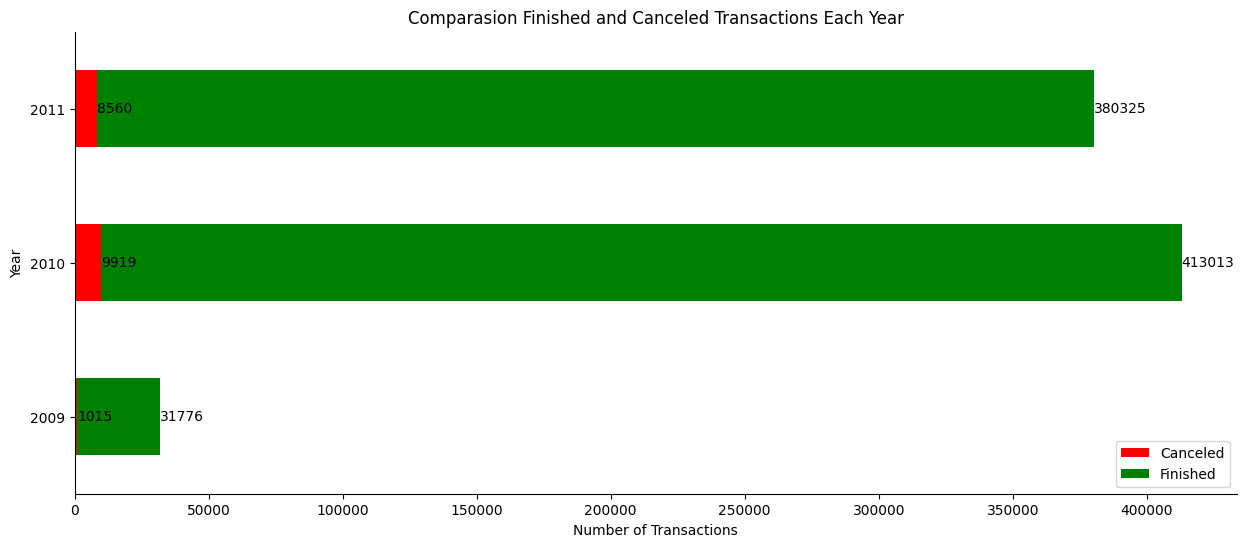

In [391]:
# define labels and values
labels = ['Canceled', 'Finished']
values = [canceled_transaction, finished_transaction]
totals = sum(values)

# plot pyramid diagram
transaction_comparasion = transactions.plot.barh(x = 'Year', y = ['Canceled', 'Finished'], stacked = True, color = ['red', 'green'], figsize = (15, 6))

# customize the diagram
transaction_comparasion.set_title('Comparasion Finished and Canceled Transactions Each Year')
transaction_comparasion.set_xlabel('Number of Transactions')
transaction_comparasion.set_ylabel('Year')
transaction_comparasion.legend(['Canceled', 'Finished'], loc = 'lower right')
transaction_comparasion.spines['top'].set_visible(False)
transaction_comparasion.spines['right'].set_visible(False)

# add annotations to the bars
for i in transaction_comparasion.containers:
  transaction_comparasion.bar_label(i, label_type = 'edge', fontsize = 10)

plt.show()

### 2.4 Cancellation Rate

In [395]:
# find cancellation rate each year
cancellation_rate = pd.DataFrame(transactions['Year'])
total_customer = df_clean['Customer ID'].count()
cancellation_rate['Cancellation Rate'] = transactions.apply(lambda row: round(((row['Canceled'] / total_customer) * 100), 3), axis = 1)
cancellation_rate['Cancellation Rate'] = cancellation_rate.apply(lambda row: str(row['Cancellation Rate']) + ' %', axis = 1)
cancellation_rate

,Year,Cancellation Rate
0,2009,0.123 %
1,2010,1.203 %
2,2011,1.038 %


### 2.5 Interpretation

**the cancellation rate results are consistent with the visualization presented in step 3**. As you can see, the highest cancellation rate occured in 2010.